In [ ]:
import matplotlib
import pathlib
import glob

import mne
print(mne.__version__)

from scipy.io import loadmat, savemat
import os
import numpy as np
import pandas as pd

0.24.1


In [ ]:
!pip install mne

In [ ]:
df = np.load('/content/drive/MyDrive/eeg/New problem/meditation_data.npz')

In [ ]:
df

In [ ]:
X = df["X"]
y = df["y"]

In [ ]:
del(df)

In [ ]:
import tensorflow as tf

In [ ]:
y.shape

(24756,)

In [ ]:
y = tf.keras.utils.to_categorical(y, 4)

In [ ]:
y.shape

(24756, 4)

In [ ]:
X.shape

(24756, 32, 513)

In [ ]:
data = X

In [ ]:
X = np.zeros((data.shape[0], data.shape[2], data.shape[1]))
for i in range(data.shape[0]):
    X[i] = np.transpose(data[i])

In [ ]:
del(data)

In [ ]:
X.shape

(24756, 513, 32)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.30,shuffle=True,stratify=y,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.50,shuffle=True,stratify=y_temp,random_state=42)

In [ ]:
del(X)
del(y)

In [ ]:
X_train[0].shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((513, 32), (17329, 4), (3713, 513, 32), (3713, 4), (3714, 513, 32), (3714, 4))

In [ ]:
import tensorflow as tf 
from keras import Model
from keras.layers import Input, Dense, Bidirectional
from keras.layers.recurrent import LSTM
import numpy as np

In [ ]:
from tensorflow.keras.layers import Conv1D, LeakyReLU, MaxPool1D, Conv2D, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
inp_shape = (513, 32)
ip = tf.keras.Input(shape = inp_shape)
conv1 = tf.keras.layers.Conv1D(32, 3,)(ip)
rel = tf.keras.layers.LeakyReLU()(conv1)
conv2 = tf.keras.layers.Conv1D(16, 3,)(rel)
rel2 = tf.keras.layers.LeakyReLU()(conv2)
# lstm = tf.keras.layers.LSTM(16, return_sequences=True)(ip)
flatten = tf.keras.layers.Flatten()(rel2)
dense1 = tf.keras.layers.Dense(units = 32, kernel_initializer = 'random_normal')(flatten)
leakyRelu = tf.keras.layers.LeakyReLU()(dense1)
drop1 = tf.keras.layers.Dropout(.4)(leakyRelu)
dense2 = tf.keras.layers.Dense(units = 16, kernel_initializer = 'random_normal')(drop1)
leakyRelu2 = tf.keras.layers.LeakyReLU()(dense2)
drop2 = tf.keras.layers.Dropout(.4)(dense2)
out = tf.keras.layers.Dense(4, activation = 'softmax')(drop2)

cnn = tf.keras.Model(inputs = ip, outputs = out)
cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 513, 32)]         0         
                                                                 
 conv1d_2 (Conv1D)           (None, 511, 32)           3104      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 511, 32)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 509, 16)           1552      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 509, 16)           0         
                                                                 
 flatten_1 (Flatten)         (None, 8144)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                2606

In [ ]:
cnn.compile(loss = 'categorical_crossentropy', metrics = ['acc'], optimizer = 'adam')

In [ ]:
history = cnn.fit(X_train,y_train,epochs=100,batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
542/542 [==============================] - 15s 10ms/step - loss: 1.9415 - acc: 0.2611 - val_loss: 1.3736 - val_acc: 0.2793
Epoch 2/100
542/542 [==============================] - 4s 8ms/step - loss: 1.3935 - acc: 0.2837 - val_loss: 1.3349 - val_acc: 0.3135
Epoch 3/100
542/542 [==============================] - 4s 8ms/step - loss: 1.3453 - acc: 0.3135 - val_loss: 1.3062 - val_acc: 0.3326
Epoch 4/100
542/542 [==============================] - 4s 8ms/step - loss: 1.3083 - acc: 0.3423 - val_loss: 1.2761 - val_acc: 0.3517
Epoch 5/100
542/542 [==============================] - 4s 8ms/step - loss: 1.2790 - acc: 0.3753 - val_loss: 1.2804 - val_acc: 0.3577
Epoch 6/100
542/542 [==============================] - 4s 8ms/step - loss: 1.2614 - acc: 0.3891 - val_loss: 1.2596 - val_acc: 0.3832
Epoch 7/100
542/542 [==============================] - 4s 8ms/step - loss: 1.2363 - acc: 0.4041 - val_loss: 1.2674 - val_acc: 0.3768
Epoch 8/100
542/542 [==============================] - 4s 8ms/step 

In [ ]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


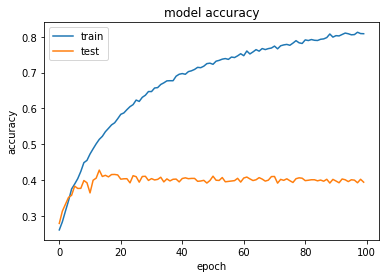

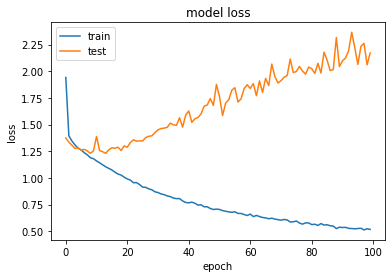

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
inp_shape = (513, 32)
ip = tf.keras.Input(shape = inp_shape)
                    
conv1 = tf.keras.layers.Conv1D(32, 3)(ip)
rel1 = tf.keras.layers.LeakyReLU()(conv1)
max1 = tf.keras.layers.MaxPool1D(pool_size=2, strides=2)(rel1)

conv2 = tf.keras.layers.Conv1D(32, 3)(max1)
rel2 = tf.keras.layers.LeakyReLU()(conv2)
max2 = tf.keras.layers.MaxPool1D(pool_size=2, strides=2)(rel2)

conv3 = tf.keras.layers.Conv1D(64, 3)(max2)
rel3 = tf.keras.layers.LeakyReLU()(conv3)
max3 = tf.keras.layers.MaxPool1D(pool_size=2, strides=2)(rel3)

conv4 = tf.keras.layers.Conv1D(64, 3)(max3)
rel4 = tf.keras.layers.LeakyReLU()(conv4)
max4 = tf.keras.layers.MaxPool1D(pool_size=2, strides=2)(rel4)

conv5 = tf.keras.layers.Conv1D(80, 3)(max4)
rel5 = tf.keras.layers.LeakyReLU()(conv5)
max5 = tf.keras.layers.MaxPool1D(pool_size=2, strides=2)(rel5)

conv6 = tf.keras.layers.Conv1D(80, 3)(max5)
rel6 = tf.keras.layers.LeakyReLU()(conv6)
max6 = tf.keras.layers.MaxPool1D(pool_size=2, strides=2)(rel6)

conv7 = tf.keras.layers.Conv1D(128, 3)(max6)
rel7 = tf.keras.layers.LeakyReLU()(conv7)
max7 = tf.keras.layers.MaxPool1D(pool_size=2, strides=2)(rel7)

# conv8 = tf.keras.layers.Conv1D(16, 3)(max7)
# rel8 = tf.keras.layers.LeakyReLU()(conv8)
# max8 = tf.keras.layers.MaxPool1D(pool_size=2, strides=2, padding='valid')(rel8)
                    
lstm1 = tf.keras.layers.LSTM(128, return_sequences=True)(max7)
rel10 = tf.keras.layers.LeakyReLU()(lstm1)
                    
lstm2 = tf.keras.layers.LSTM(128, return_sequences=True)(rel10)
rel11 = tf.keras.layers.LeakyReLU()(lstm2)
                    
lstm3 = tf.keras.layers.LSTM(128, return_sequences=True)(rel11)                    
rel12 = tf.keras.layers.LeakyReLU()(lstm3)
                    
# batch1 = tf.keras.layers.BatchNormalization()(rel12)
# batch2 = tf.keras.layers.BatchNormalization()(batch1)
                                      
flatten = tf.keras.layers.Flatten()(rel12)
                    
dense1 = tf.keras.layers.Dense(units = 128, kernel_initializer = 'random_normal')(flatten)
leakyRelu = tf.keras.layers.LeakyReLU()(dense1)
drop1 = tf.keras.layers.Dropout(.4)(leakyRelu)
                    
dense2 = tf.keras.layers.Dense(units = 64, kernel_initializer = 'random_normal')(drop1)
leakyRelu2 = tf.keras.layers.LeakyReLU()(dense2)
drop2 = tf.keras.layers.Dropout(.4)(dense2)
                    
out = tf.keras.layers.Dense(4, activation = 'softmax')(drop2)

model4 = tf.keras.Model(inputs = ip, outputs = out)
model4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 513, 32)]         0         
                                                                 
 conv1d_60 (Conv1D)          (None, 511, 32)           3104      
                                                                 
 leaky_re_lu_70 (LeakyReLU)  (None, 511, 32)           0         
                                                                 
 max_pooling1d_52 (MaxPoolin  (None, 255, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_61 (Conv1D)          (None, 253, 32)           3104      
                                                                 
 leaky_re_lu_71 (LeakyReLU)  (None, 253, 32)           0         
                                                           

In [ ]:
optimizer4 = tf.keras.optimizers.RMSprop(learning_rate=0.001, name='adam')

In [ ]:
model4.compile(loss = 'categorical_crossentropy', metrics = ['acc'], optimizer = optimizer4)

In [ ]:
history4 = model4.fit(X_train,y_train,epochs=20,batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
542/542 [==============================] - 20s 24ms/step - loss: 1.3870 - acc: 0.2483 - val_loss: 1.3869 - val_acc: 0.2459
Epoch 2/20
542/542 [==============================] - 12s 22ms/step - loss: 1.3868 - acc: 0.2447 - val_loss: 1.3867 - val_acc: 0.2545
Epoch 3/20
542/542 [==============================] - 12s 21ms/step - loss: 1.3868 - acc: 0.2531 - val_loss: 1.3864 - val_acc: 0.2545
Epoch 4/20
542/542 [==============================] - 12s 22ms/step - loss: 1.3869 - acc: 0.2460 - val_loss: 1.3865 - val_acc: 0.2545
Epoch 5/20
542/542 [==============================] - 12s 21ms/step - loss: 1.3867 - acc: 0.2479 - val_loss: 1.3870 - val_acc: 0.2545
Epoch 6/20
542/542 [==============================] - 12s 21ms/step - loss: 1.3867 - acc: 0.2529 - val_loss: 1.3863 - val_acc: 0.2515
Epoch 7/20
542/542 [==============================] - 12s 22ms/step - loss: 1.3867 - acc: 0.2519 - val_loss: 1.3868 - val_acc: 0.2480
Epoch 8/20
542/542 [==============================] - 12s 22ms

KeyboardInterrupt: ignored